<div style="background-color:#f5f5f5; padding:20px; border-radius:10px; text-align:center; font-family:Georgia, serif;">

  <h1 style="color:#8B0000; font-size:40px;">🍷 Wine Quality Prediction Project</h1>

  <p style="font-size:18px; color:#333;">
    Wine quality assessment is traditionally performed by expert tasters, but with the rise of 
    <b style="color:#8B0000;">Machine Learning</b>, we can build models that predict wine quality 
    based on its chemical properties.
  </p>

  <hr style="border:1px solid #8B0000; width:60%;">

  <h2 style="color:#444;">📌 Project Overview</h2>
  <ul style="text-align:left; font-size:16px; line-height:1.6;">
    <li>Transform wine quality scores into <b>Low / Medium / High</b> categories.</li>
    <li>Train multiple models: Logistic Regression, SVM, Random Forest, Decision Tree, KNN.</li>
    <li>Compare performance using accuracy, confusion matrix, and classification report.</li>
    <li>Visualize results with bar plots and heatmaps.</li>
    <li>Save the best model and scaler for deployment.</li>
  </ul>

  <p style="font-size:16px; color:#555; margin-top:20px;">
    🍇 <i>"Good wine is a symphony of chemistry and taste — let's see if machine learning can play the tune!"</i>
  </p>

</div>


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import pickle

In [16]:
df=pd.read_csv(r"C:\Users\ADITHYA\OneDrive\Desktop\Wine Quality\winequalityN.csv")
df.head

<bound method NDFrame.head of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total s

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [19]:
df.columns.unique()

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [20]:
df.isna().sum()



type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [21]:
# Convert quality to 3-class labels: low/medium/high
def convert(q):
    if q <= 5: return 0
    elif q == 6: return 1
    else: return 2

df["label"] = df["quality"].apply(convert)


In [22]:
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_3652\972890044.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [23]:
df


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,1
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0


In [25]:
print(df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
label                   0
dtype: int64


In [26]:
y = df["label"]
X = df.drop(["quality", "label"], axis=1)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6497, 12)
y shape: (6497,)


In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

accuracies = {}
conf_matrices = {}

In [30]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = accuracy_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)

    accuracies[name] = acc
    conf_matrices[name] = cm

    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, pred))


Logistic Regression:
Accuracy: 0.5584615384615385
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.58      0.61       477
           1       0.51      0.64      0.57       567
           2       0.57      0.34      0.42       256

    accuracy                           0.56      1300
   macro avg       0.57      0.52      0.53      1300
weighted avg       0.57      0.56      0.55      1300


SVM:
Accuracy: 0.6046153846153847
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67       477
           1       0.55      0.67      0.60       567
           2       0.62      0.36      0.45       256

    accuracy                           0.60      1300
   macro avg       0.62      0.56      0.58      1300
weighted avg       0.61      0.60      0.60      1300


Random Forest:
Accuracy: 0.7253846153846154
Classification Report:
               precision    recall  

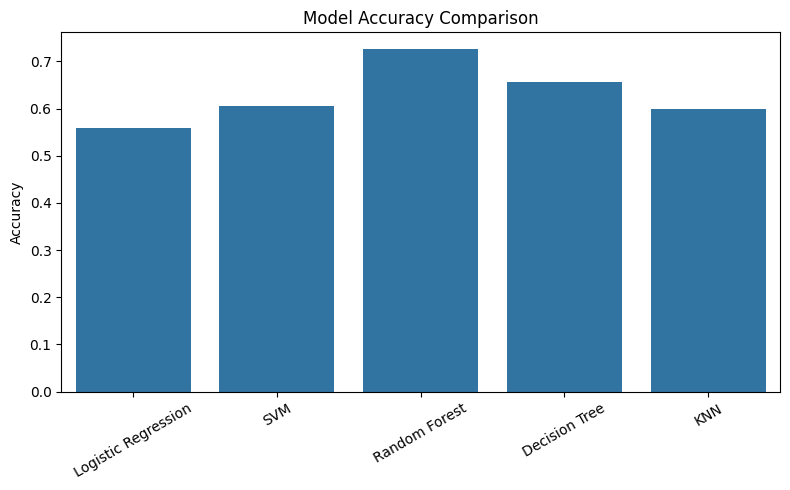

In [31]:
# --------------------------------------
# 7. Visualization: Model Accuracy Comparison
# --------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("model_accuracy_comparison.png", dpi=300)
plt.show()


In [32]:
# --------------------------------------
# 8. Confusion Matrix for Best Model
# --------------------------------------
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("\nBest Model:", best_model_name)

best_cm = conf_matrices[best_model_name]



Best Model: Random Forest


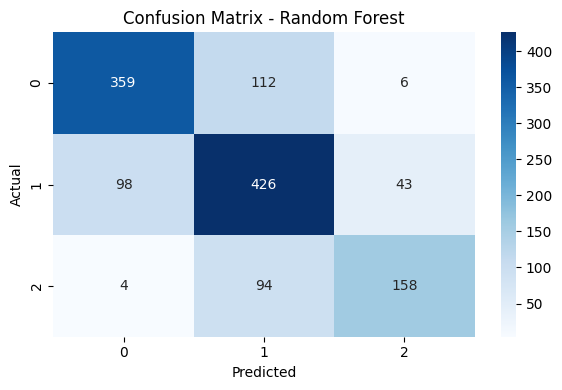

In [33]:
plt.figure(figsize=(6,4))
sns.heatmap(best_cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("best_model_confusion_matrix.png", dpi=300)
plt.show()


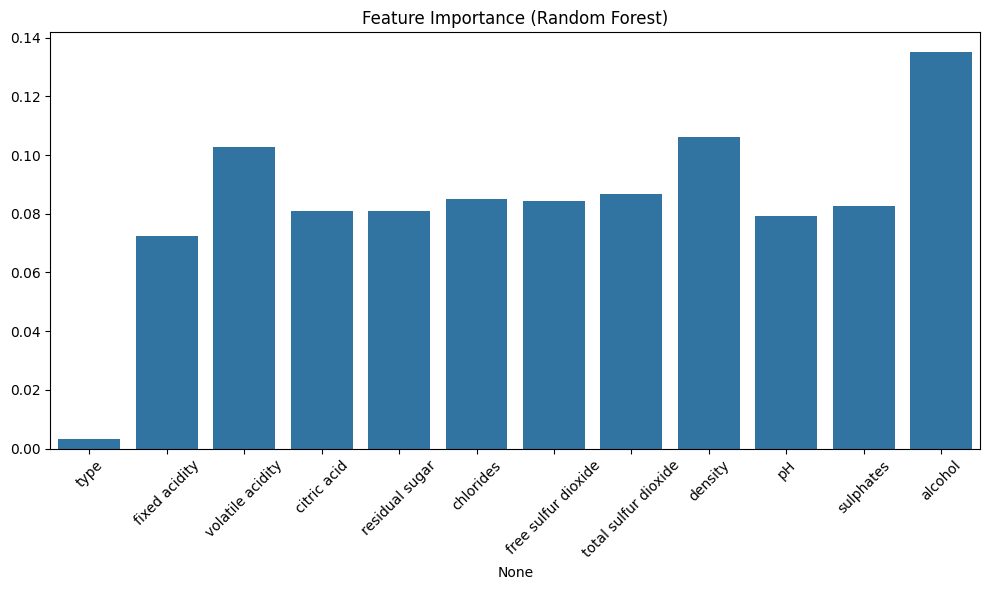

In [34]:
# --------------------------------------
# 9. Feature Importance (Only for Random Forest)
# --------------------------------------
if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
    plt.figure(figsize=(10,6))
    sns.barplot(x=X.columns, y=importances)
    plt.title("Feature Importance (Random Forest)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("feature_importance.png", dpi=300)
    plt.show()

In [36]:
import pickle

# ✅ Save the dataframe to a pickle file
with open("wine_df.pkl", "wb") as f:
    pickle.dump(le, f)

# --------------------------------------
# 10. Save best model + scaler
# --------------------------------------
with open("best_modelWINE.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("best_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("\nSaved: best_model.pkl & best_scaler.pkl")




Saved: best_model.pkl & best_scaler.pkl
